In [4]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [5]:
import pandas as pd

def load_data():
    csv_path = os.path.join("Data", "general_data.csv")
    rcsv = pd.read_csv(csv_path)
    df = pd.DataFrame(rcsv)
    return df

In [6]:
general_data = load_data()

In [7]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Age


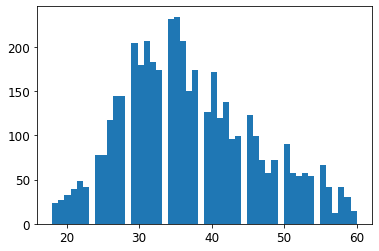

Attrition


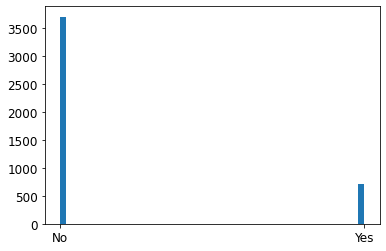

BusinessTravel


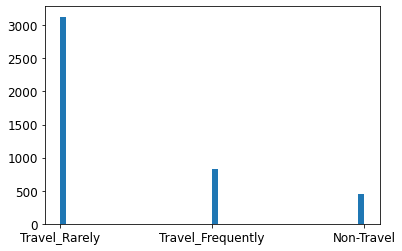

Department


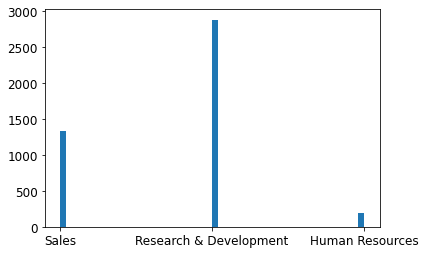

DistanceFromHome


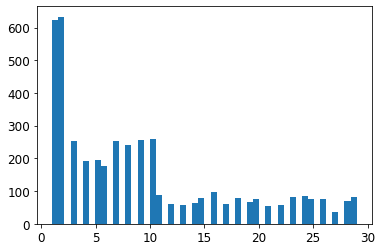

Education


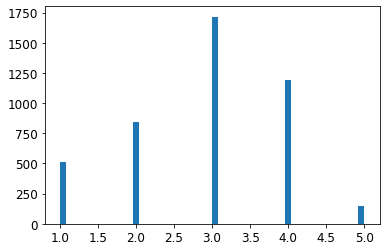

EducationField


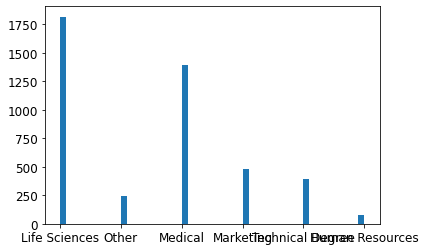

EmployeeCount


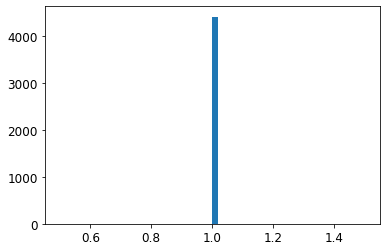

EmployeeID


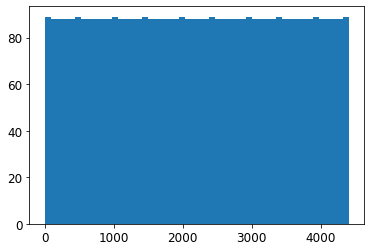

Gender


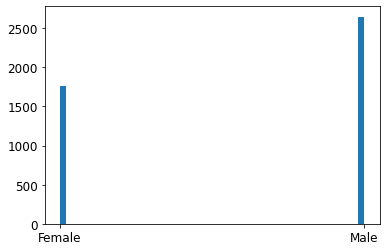

JobLevel


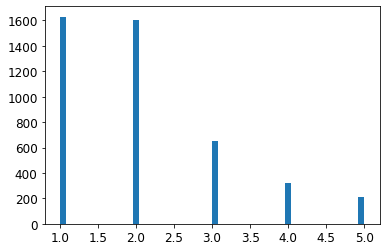

JobRole


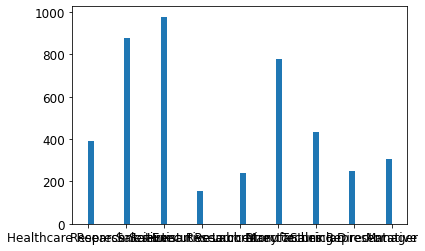

MaritalStatus


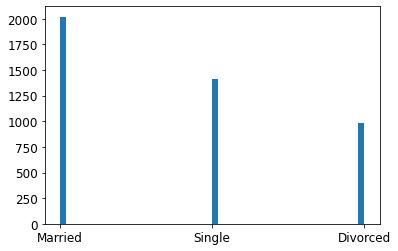

MonthlyIncome


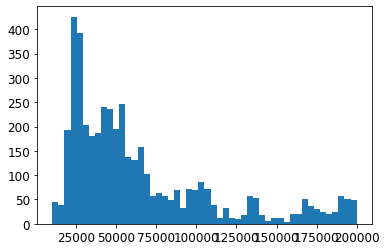

NumCompaniesWorked


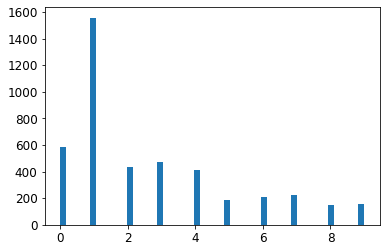

Over18


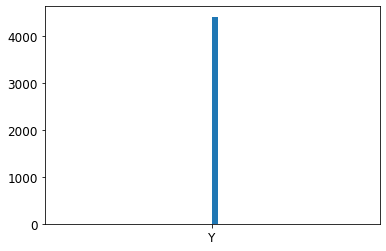

PercentSalaryHike


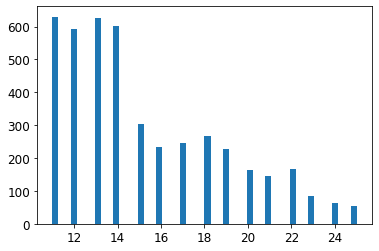

StandardHours


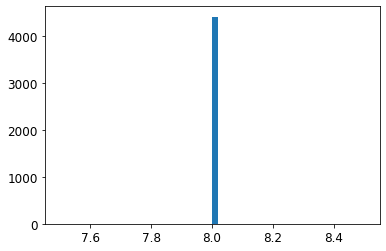

StockOptionLevel


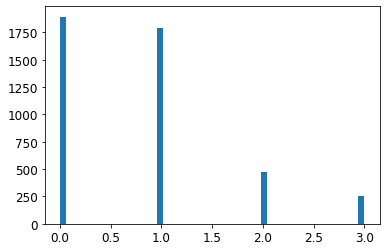

TotalWorkingYears


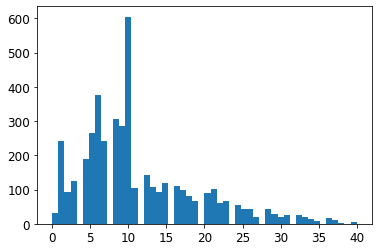

TrainingTimesLastYear


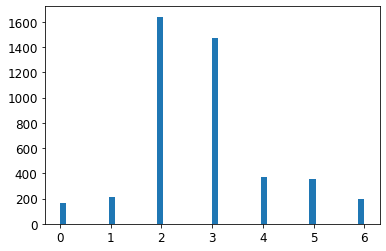

YearsAtCompany


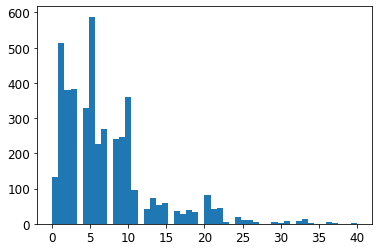

YearsSinceLastPromotion


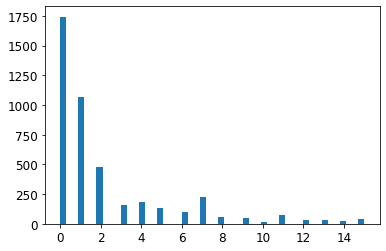

YearsWithCurrManager


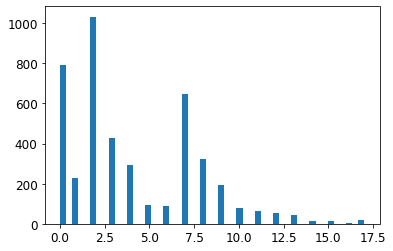

In [8]:
for column in general_data.columns:
    plt.hist(general_data[column].squeeze(), bins=50)
    print(column)
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(general_data, test_size = 0.2)

In [64]:
train_set.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2279,47,No,Travel_Rarely,Research & Development,8,4,Medical,1,2280,Female,...,3.0,Y,17,8,0,11.0,5,5,1,2
3985,47,No,Travel_Rarely,Research & Development,19,5,Medical,1,3986,Female,...,8.0,Y,14,8,1,28.0,3,22,14,10
1278,36,No,Travel_Frequently,Research & Development,3,3,Life Sciences,1,1279,Female,...,1.0,Y,13,8,0,6.0,5,6,0,3
2997,43,No,Travel_Frequently,Research & Development,7,4,Medical,1,2998,Male,...,0.0,Y,15,8,0,9.0,2,8,1,7
831,37,No,Travel_Rarely,Research & Development,2,2,Medical,1,832,Male,...,1.0,Y,12,8,0,10.0,1,10,3,7


In [65]:
test_set.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
321,34,No,Travel_Rarely,Sales,2,3,Marketing,1,322,Male,...,1.0,Y,12,8,0,6.0,2,6,1,3
2014,33,No,Travel_Frequently,Sales,9,3,Medical,1,2015,Female,...,0.0,Y,12,8,0,4.0,2,3,0,2
1121,27,Yes,Travel_Frequently,Sales,8,1,Life Sciences,1,1122,Male,...,1.0,Y,13,8,1,1.0,2,1,0,0
3538,20,No,Travel_Rarely,Research & Development,6,3,Medical,1,3539,Male,...,1.0,Y,17,8,0,2.0,5,2,1,2
1795,34,No,Travel_Rarely,Research & Development,10,3,Life Sciences,1,1796,Male,...,5.0,Y,24,8,2,6.0,2,3,1,2


<AxesSubplot:>

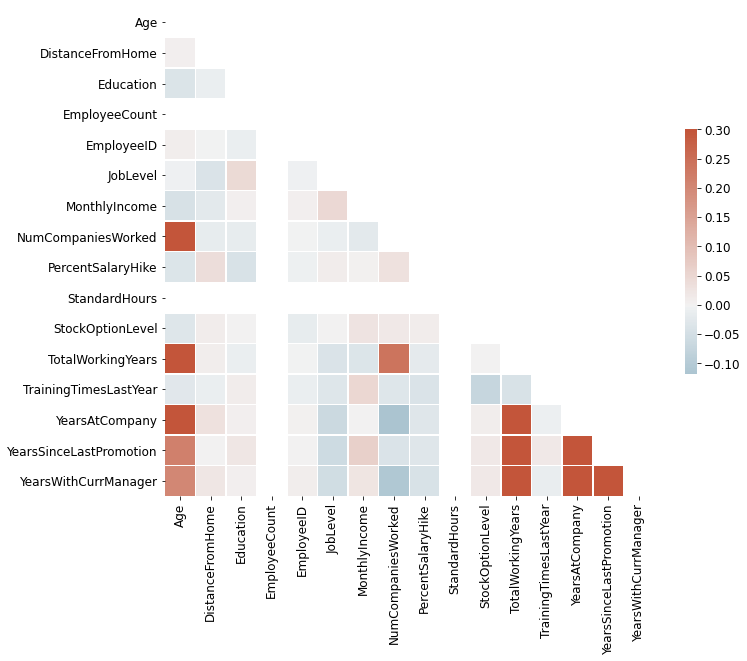

In [62]:
import seaborn as sns

corr = general_data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [56]:
general_data.info()
genral_copy = general_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [57]:
sample_incomplete_rows = genral_copy[genral_copy.isnull().any(axis=1)].head()
sample_incomplete_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,...,1.0,Y,14,8,0,NaN,4,20,11,6
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,...,NaN,Y,12,8,1,5.0,2,5,0,4
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,1,138,Female,...,7.0,Y,14,8,2,NaN,3,3,1,2
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,...,NaN,Y,11,8,1,18.0,2,10,6,9
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,309,Male,...,4.0,Y,13,8,1,NaN,2,5,1,3


In [60]:
median = general_data["NumCompaniesWorked"].median()
sample_incomplete_rows["NumCompaniesWorked"].fillna(median, inplace=True)
sample_incomplete_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,...,1.0,Y,14,8,0,NaN,4,20,11,6
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,...,2.0,Y,12,8,1,5.0,2,5,0,4
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,1,138,Female,...,7.0,Y,14,8,2,NaN,3,3,1,2
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,...,2.0,Y,11,8,1,18.0,2,10,6,9
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,309,Male,...,4.0,Y,13,8,1,NaN,2,5,1,3


In [69]:
just_trying = general_data.copy()

from sklearn.preprocessing import LabelEncoder
just_trying.head()

#cats = just_trying['BusinessTravel'].unique()
label_enc = LabelEncoder()
just_trying['Attrition'] = label_enc.fit_transform(just_trying['Attrition'])
just_trying['BusinessTravel'] = label_enc.fit_transform(just_trying['BusinessTravel'])
just_trying['Department'] = label_enc.fit_transform(just_trying['Department'])
just_trying['EducationField'] = label_enc.fit_transform(just_trying['EducationField'])
just_trying['Gender'] = label_enc.fit_transform(just_trying['Gender'])
just_trying['JobRole'] = label_enc.fit_transform(just_trying['JobRole'])
just_trying['MaritalStatus'] = label_enc.fit_transform(just_trying['MaritalStatus'])
just_trying['Over18'] = label_enc.fit_transform(just_trying['Over18'])

just_trying

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,...,3.0,0,17,8,1,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,...,2.0,0,15,8,0,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,...,0.0,0,20,8,0,5.0,4,4,1,2
4408,42,0,2,2,18,2,3,1,4409,1,...,0.0,0,14,8,1,10.0,2,9,7,8
